<a href="https://colab.research.google.com/github/P-RAJESWARI/Linear-Algebra/blob/main/Diagonalization/Diagonalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

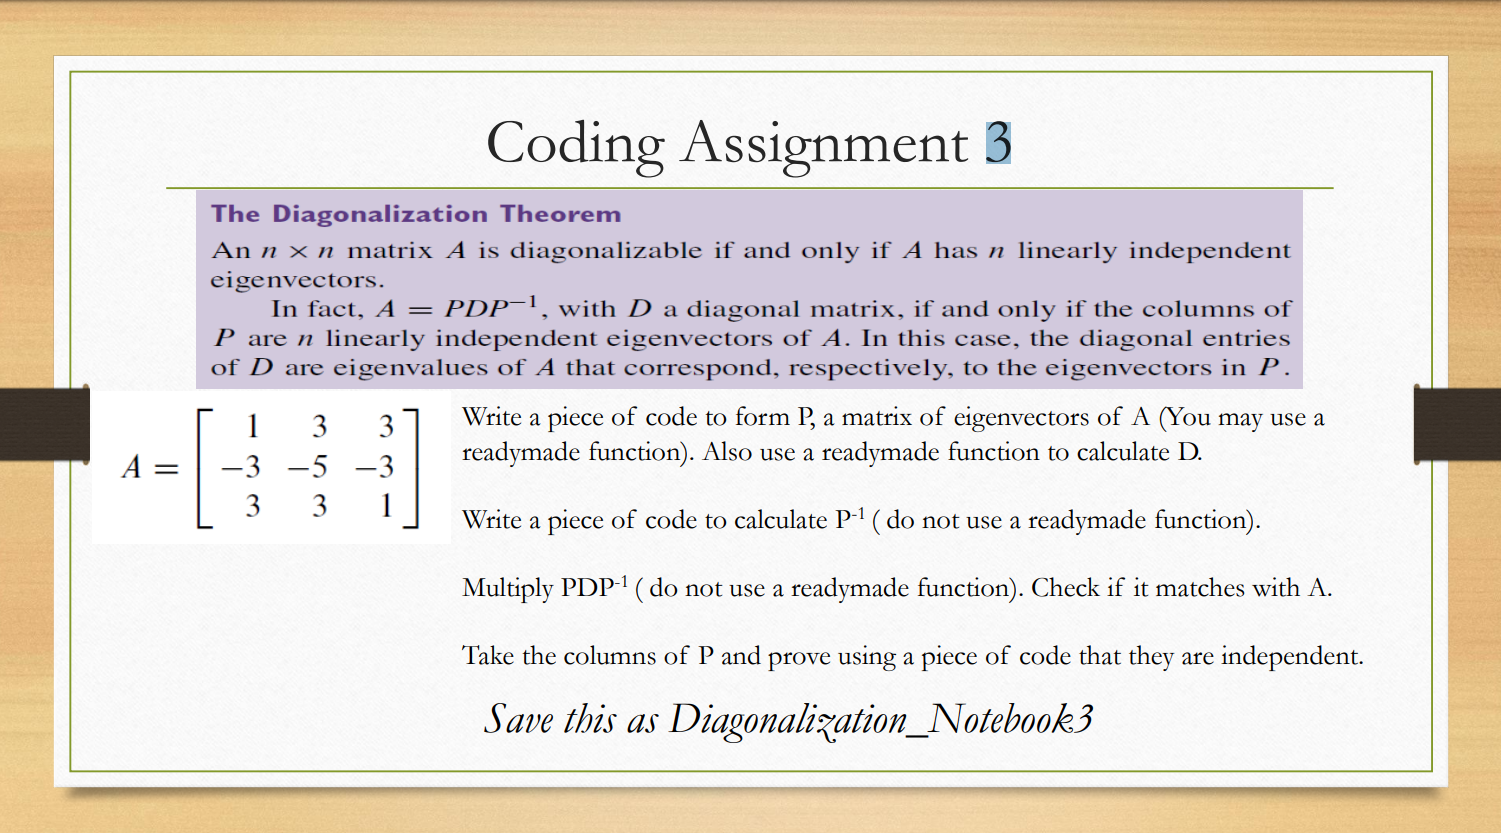

In [44]:
#import necessary libraries
import sympy as sp
import numpy as np

An nxn matrix is diagonalizable if and only if A has n linearly independent Eigen vectors

A=PDP^-1 with D a diagonal matrix ,if and only if columns of P are linearly independent Eigen vectors of A

Diagonal entries of D are Eigen values of A

1. Write a piece of code to form P, a matrix of eigenvectors of A (You may use a readymade function). Also use a readymade function to calculate D

In [45]:
#diagonalize the matrix A as A=PDP^-1 using sympy's diagonalize() function
def diagonalize(A):
  P,D=A.diagonalize()
  print("\nThe matrix P is \n")
  print(P)
  print("\nThe Diagonal matrix D is \n")
  print(D)
  return P,D

In [46]:
A=sp.Matrix([[1,3,3],[-3,-5,-3],[3,3,1]])
P1,D1=diagonalize(A)


The matrix P is 

Matrix([[-1, -1, 1], [1, 0, -1], [0, 1, 1]])

The Diagonal matrix D is 

Matrix([[-2, 0, 0], [0, -2, 0], [0, 0, 1]])


In [47]:
print("Matrix P is")
P1

Matrix P is


Matrix([
[-1, -1,  1],
[ 1,  0, -1],
[ 0,  1,  1]])

In [48]:
print("\nDiagonal Matrix D is\n")
D1


Diagonal Matrix D is



Matrix([
[-2,  0, 0],
[ 0, -2, 0],
[ 0,  0, 1]])

2. Write a piece of code to calculate P^-1 (do not use readymade function)

In [18]:
# This function converts a matrix into its Reduced Row Echelon Form (RREF)
def rref(matrix):
    # Create a copy of the matrix to avoid changing the original
    mat = [row[:] for row in matrix]

    # Get the number of rows and columns in the matrix
    rows, cols = len(mat), len(mat[0])

    # Initialize the leading variable
    lead = 0

    # Loop through each row of the matrix
    for r in range(rows):
        # If the leading variable is greater than or equal to the number of columns, stop the loop
        if lead >= cols:
            break

        # Find a non-zero element in the current column
        i = r
        while mat[i][lead] == 0:
            i += 1
            # If we reach the end of the rows, go back to the current row and move to the next column
            if i == rows:
                i = r
                lead += 1
                # If we've processed all columns, the matrix is already in RREF, so we're done
                if cols == lead:
                    return mat

        # Swap rows to bring the leading element to the diagonal position
        mat[i], mat[r] = mat[r], mat[i]

        # Get the value of the leading element
        lv = mat[r][lead]

        # Make the leading element 1 by dividing the row by its leading element
        mat[r] = [mrx / float(lv) for mrx in mat[r]]

        # Perform row operations to make other elements in the column zero
        for i in range(rows):
            if i != r:
                lv = mat[i][lead]
                mat[i] = [iv - lv * rv for rv, iv in zip(mat[r], mat[i])]

        # Move to the next column
        lead += 1

    # Return the matrix in Reduced Row Echelon Form (RREF)
    return mat

In [49]:
# This function calculates the inverse of a square matrix
def inverse(matrix):
    # Get the number of rows and columns in the matrix
    rows, cols = len(matrix), len(matrix[0])

    # Check if the matrix is square (equal number of rows and columns)
    if rows != cols:
        raise ValueError("Input matrix must be square")

    # Augment the matrix with an identity matrix
    augmented_matrix = [row + [int(i == j) for j in range(cols)] for i, row in enumerate(matrix)]

    # Calculate the RREF of the augmented matrix
    rref_matrix = rref(augmented_matrix)

    # Extract the inverse matrix from the right-hand side of the RREF matrix (the identity matrix part)
    inv_matrix = [row[cols:] for row in rref_matrix]

    # Return the inverse matrix
    return inv_matrix

In [53]:
P=P1.tolist()
Pinv=inverse(P)

print("\nP^-1 is\n")
Pinv


P^-1 is



[[1.00000000000000, 2.00000000000000, 1.00000000000000],
 [-1.00000000000000, -1.00000000000000, 0],
 [1.00000000000000, 1.00000000000000, 1.00000000000000]]

3. Multiply PDP-1 (do not use a readymade function). Check if it matches with A

In [21]:
def matrix_multiply(A, B):
    # Get the dimensions of matrices A and inv
    arow = len(A)  # Number of rows in matrix A
    acol = len(A[0])  # Number of columns in matrix A
    inrow = len(B)  # Number of rows in matrix inv
    incol = len(B[0])  # Number of columns in matrix inv

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(incol)] for _ in range(arow)]

    # Check if matrix multiplication is possible (number of columns in A equals number of rows in inv)
    if acol == inrow:
        # Perform matrix multiplication
        for i in range(arow):  # Loop through each row of matrix A
            for j in range(incol):  # Loop through each column of matrix inv
                for k in range(inrow):  # Loop through each element for multiplication
                    result[i][j] += A[i][k] * B[k][j]  # Multiply and accumulate the result

    # Return the resulting matrix
    return result

In [26]:
D=D1.tolist()
PD=matrix_multiply(P,D)
PDPinv=matrix_multiply(PD,Pinv)
print("\nPDP^-1 is\n")
Pin=sp.Matrix(PDPinv)
Pin


PDP^-1 is



Matrix([
[ 1.0,  3.0,  3.0],
[-3.0, -5.0, -3.0],
[ 3.0,  3.0,  1.0]])

In [27]:
print("\n Matrix A is \n")
A


 Matrix A is 



Matrix([
[ 1,  3,  3],
[-3, -5, -3],
[ 3,  3,  1]])

Checking PDP^-1 matches with A or not

In [28]:
if(Pin.equals(A)):
  print("Matrix PDP^-1 and matrix A are equal")
else:
  print("Matrix PDP^-1 and matrix A are not equal")

Matrix PDP^-1 and matrix A are equal


4. Take the columns of P and prove using a piece of code that they are independent.

In [52]:
# Compute the RREF ,we get pivot_columns
# Pivot_columns indicates the non-zero column in the rref of matrix
rref_matrix, pivot_columns = P1.rref()
print("Reduced Row Echolon form of the matrix P is")
rref_matrix

Reduced Row Echolon form of the matrix P is


Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

We can also conclude that matrix columns in matrix P ie.basis is linearly independent by seeing the rref of matrix as it has 3 non-zero rows

In [50]:
#Calculating no of pivot columns in the rref of matrix
print("Pivot columns are ",pivot_columns)
n=len(pivot_columns)
print("No of non-zero rows in rref of matrix P :",n)

Pivot columns are  (0, 1, 2)
No of non-zero rows in rref of matrix P : 3


In [51]:
#If no of pivot column equals the no of rows or columns in the matrix ,then the columns of P ie.basis are independent
#Calculate either no of rows or columns of the matrix P since P is the square matrix
rn=P1.rows
if(rn==n):
  print("The basis in the matrix P are linearly independent")
else:
  print("The basis in the matrix P are not linearly independent")

The basis in the matrix P are linearly independent
